# 0. Importar las librerias

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

%matplotlib inline

# 1. Datos

### Context
This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

https://www.kaggle.com/uciml/pima-indians-diabetes-database?select=diabetes.csv

### Content
The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

https://medium.com/analytics-vidhya/analyzing-pima-indian-diabetes-dataset-36d02a8a10e5

### Question
Can you build a machine learning model to accurately predict whether or not the patients in the dataset have diabetes or not?

In [2]:
df = pd.read_csv('..\Datasets\diabetes.csv')

# 2. Análisis Exploratorio

In [3]:
df.shape

(768, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Valores cero de los atributos

In [7]:
df_nz = df.copy()

Atributo: Pregnancies
Número de valores 0:  111
Porcentaje de valores cero: 14.45


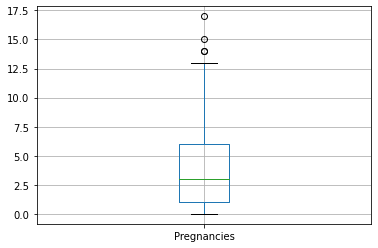

Atributo: Glucose
Número de valores 0:  5
Porcentaje de valores cero: 0.65


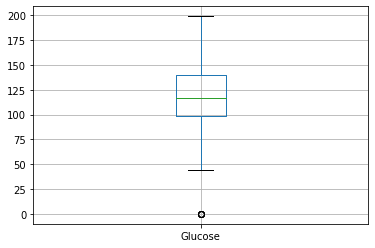

Atributo: BloodPressure
Número de valores 0:  35
Porcentaje de valores cero: 4.56


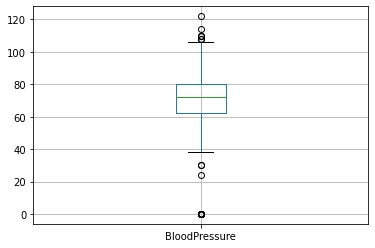

Atributo: SkinThickness
Número de valores 0:  227
Porcentaje de valores cero: 29.56


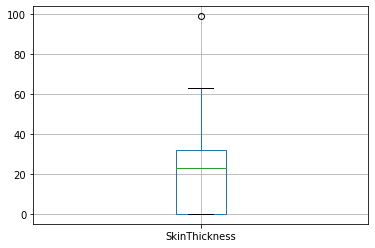

Atributo: Insulin
Número de valores 0:  374
Porcentaje de valores cero: 48.70


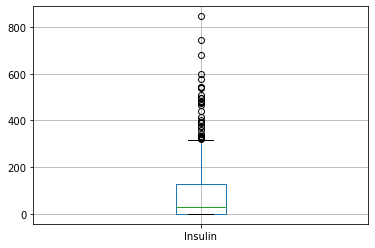

Atributo: BMI
Número de valores 0:  11
Porcentaje de valores cero: 1.43


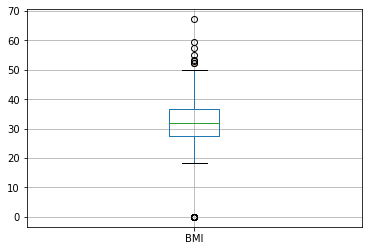

Atributo: DiabetesPedigreeFunction
Número de valores 0:  0
Porcentaje de valores cero: 0.00


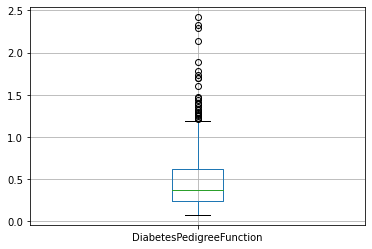

Atributo: Age
Número de valores 0:  0
Porcentaje de valores cero: 0.00


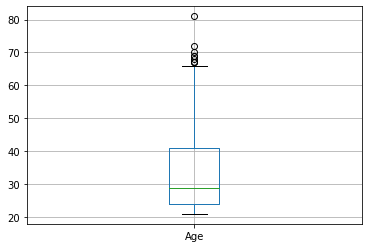

In [8]:
#atributo = "Age" 
#atributo = "BloodPressure"
#atributo = "BMI"
#atributo = "DiabetesPedigreeFunction"
#atributo = "Glucose"
#atributo = "Insulin"
#atributo = "Pregnancies"
#atributo = "SkinThickness"

n_rows, n_cols = df.shape

for i in range(n_cols-1):
    atributo_de_interes = df.columns[i]
    count = (df_nz[atributo_de_interes] == 0).sum()
    print('Atributo: ' + atributo_de_interes)
    print("Número de valores 0: ", count)
    print("Porcentaje de valores cero: %.2f" % (100*count/n_rows))
    #print('\n')
    df_nz.boxplot(column=[atributo_de_interes])
    plt.show()

#### Violin Plots

In general, violin plots are a method of plotting numeric data and can be considered a combination of the box plot with a kernel density plot. In the violin plot, we can find the same information as in the box plots:

- median (a white dot on the violin plot)
- interquartile range (the black bar in the center of violin)

The unquestionable advantage of the violin plot over the box plot is that aside from showing the abovementioned statistics it also shows the entire distribution of the data. This is of interest, especially when dealing with multimodal data, i.e., a distribution with more than one peak.

![min_cuad.png](img/ViolinPlot-boxplot.png)

Atributo: Pregnancies
Número de valores 0:  111
Porcentaje de valores cero: 14.45


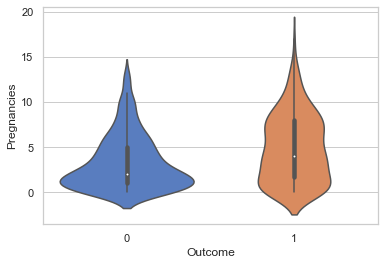

Atributo: Glucose
Número de valores 0:  5
Porcentaje de valores cero: 0.65


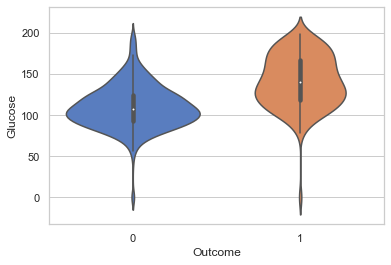

Atributo: BloodPressure
Número de valores 0:  35
Porcentaje de valores cero: 4.56


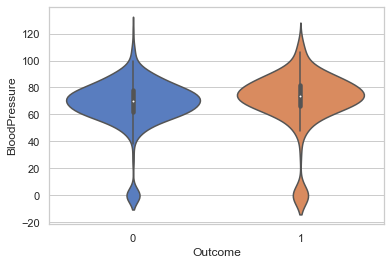

Atributo: SkinThickness
Número de valores 0:  227
Porcentaje de valores cero: 29.56


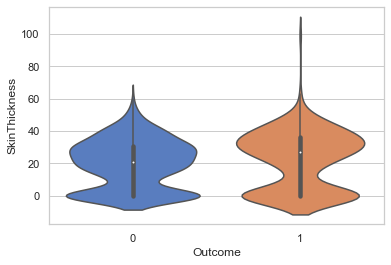

Atributo: Insulin
Número de valores 0:  374
Porcentaje de valores cero: 48.70


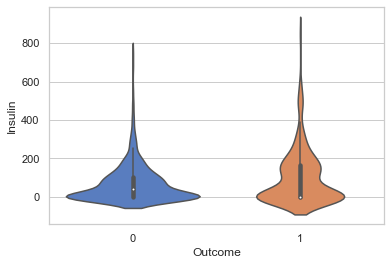

Atributo: BMI
Número de valores 0:  11
Porcentaje de valores cero: 1.43


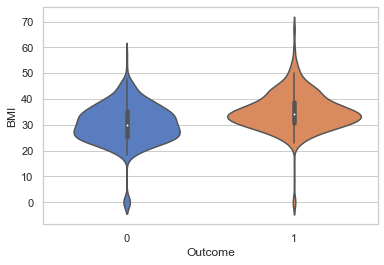

Atributo: DiabetesPedigreeFunction
Número de valores 0:  0
Porcentaje de valores cero: 0.00


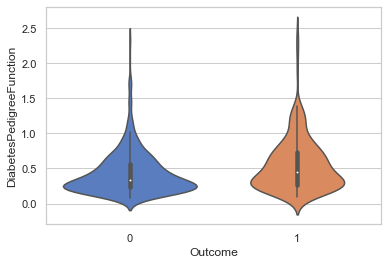

Atributo: Age
Número de valores 0:  0
Porcentaje de valores cero: 0.00


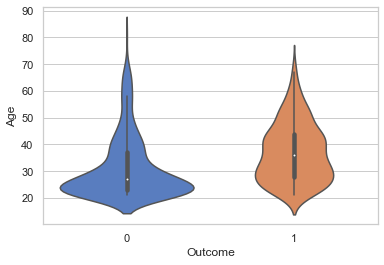

In [9]:
#atributo = "Age" 
#atributo = "BloodPressure"
#atributo = "BMI"
#atributo = "DiabetesPedigreeFunction"
#atributo = "Glucose"
#atributo = "Insulin"
#atributo = "Pregnancies"
#atributo = "SkinThickness"

sns.set_theme(style="whitegrid")     
n_rows, n_cols = df.shape

for i in range(n_cols-1):
    atributo_de_interes = df.columns[i]
    count = (df_nz[atributo_de_interes] == 0).sum()
    print('Atributo: ' + atributo_de_interes)
    print("Número de valores 0: ", count)
    print("Porcentaje de valores cero: %.2f" % (100*count/n_rows))
    ax = sns.violinplot(x="Outcome", y=atributo_de_interes, data=df_nz, palette="muted", split=True)
    plt.show()

In [10]:
#atributo = "Age" 
#atributo = "BloodPressure"
#atributo = "BMI"
#atributo = "DiabetesPedigreeFunction"
#atributo = "Glucose"
#atributo = "Insulin"
#atributo = "Pregnancies"
#atributo = "SkinThickness"

sns.set_theme(style="whitegrid")     
n_rows, n_cols = df.shape
df1 = df_nz.loc[df_nz['Outcome'] == 1]
df2 = df_nz.loc[df_nz['Outcome'] == 0]

for i in range(n_cols-1):
    atributo_de_interes = df.columns[i]
    print("Mediana de atributo " + atributo_de_interes + " para Diabético: %.2f" % np.median(df1[atributo_de_interes]))
    print("Mediana de atributo " + atributo_de_interes + " para NO Diabético: %.2f" % np.median(df2[atributo_de_interes]))
    print('\n')

Mediana de atributo Pregnancies para Diabético: 4.00
Mediana de atributo Pregnancies para NO Diabético: 2.00


Mediana de atributo Glucose para Diabético: 140.00
Mediana de atributo Glucose para NO Diabético: 107.00


Mediana de atributo BloodPressure para Diabético: 74.00
Mediana de atributo BloodPressure para NO Diabético: 70.00


Mediana de atributo SkinThickness para Diabético: 27.00
Mediana de atributo SkinThickness para NO Diabético: 21.00


Mediana de atributo Insulin para Diabético: 0.00
Mediana de atributo Insulin para NO Diabético: 39.00


Mediana de atributo BMI para Diabético: 34.25
Mediana de atributo BMI para NO Diabético: 30.05


Mediana de atributo DiabetesPedigreeFunction para Diabético: 0.45
Mediana de atributo DiabetesPedigreeFunction para NO Diabético: 0.34


Mediana de atributo Age para Diabético: 36.00
Mediana de atributo Age para NO Diabético: 27.00




In [42]:
#Replacing the zero-values

df1 = df_nz.loc[df_nz['Outcome'] == 1]
df2 = df_nz.loc[df_nz['Outcome'] == 0]
df1 = df1.replace({atributo:0}, np.median(df1[atributo]))
df2 = df2.replace({atributo:0}, np.median(df2[atributo]))
dataframe = [df1, df2]
df_nz = pd.concat(dataframe)

In [ ]:
#atributo = "Age" 
#atributo = "BloodPressure"
#atributo = "BMI"
#atributo = "DiabetesPedigreeFunction"
#atributo = "Glucose"
#atributo = "Insulin"
#atributo = "Pregnancies"
#atributo = "SkinThickness"

sns.set_theme(style="whitegrid")     
n_rows, n_cols = df.shape

for i in range(n_cols-1):
    atributo_de_interes = df.columns[i]
    count = (df_nz[atributo_de_interes] == 0).sum()
    print('Atributo: ' + atributo_de_interes)
    print("Número de valores 0: ", count)
    print("Porcentaje de valores cero: %.2f" % (100*count/n_rows))
    ax = sns.violinplot(x="Outcome", y=atributo_de_interes, data=df_nz, palette="muted", split=True)
    plt.show()

### Distribución de la variable objetivo


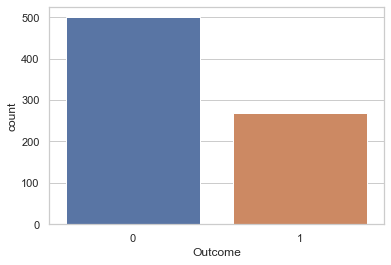

In [23]:
ax = sns.countplot(x="Outcome", data=df_nz,)

In [27]:
conteo_clase = df_nz['Outcome'].value_counts()
print('Conteo de objetos por clase:\n', conteo_clase, '\n',sep='')

Conteo de objetos por clase:
0    500
1    268
Name: Outcome, dtype: int64



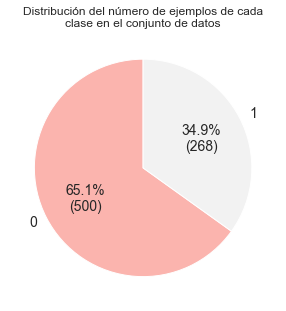

In [28]:
conteo_clase.plot(kind='pie', 
                                    figsize=(5, 5),
                                    #autopct='%1.1f%%',  #Esto muestra úicamente el porcentaje de ejemplos de cada categoría en el gráfico. 
                                    autopct=lambda pct: '{:.1f}%\n({:d})'.format(pct, int(pct/100.*conteo_clase.sum())), #Con esta función lambda se puede mostrar el porcentaje y el número absoluto de ejemplos en cada categoría. 
                                    startangle=90,       #Esto define la orientación de la línea vertical inicial de las divisiones del pie chart.
                                    fontsize=14,         #Tamaño de los textos.         
                                    cmap='Pastel1')      #Para otros color maps visite: https://matplotlib.org/stable/tutorials/colors/colormaps.html
titulo = 'Distribución del número de ejemplos de cada\nclase en el conjunto de datos'
plt.title(titulo) 
plt.ylabel('')
plt.show()

### Línea Base

In [30]:
count_p = (df_nz["Outcome"] == 1).sum()
print("Número de Observaciones para Diabéticos: ", count_p)

count_n = (df_nz["Outcome"] == 0).sum()
print("Número de Observaciones para NO Diabéticos: ", count_n)

print("Línea Base: %.2f" % (100*count_n/(count_p+count_n)) )

Número de Observaciones para Diabéticos:  268
Número de Observaciones para NO Diabéticos:  500
Línea Base: 65.10


### Correlación

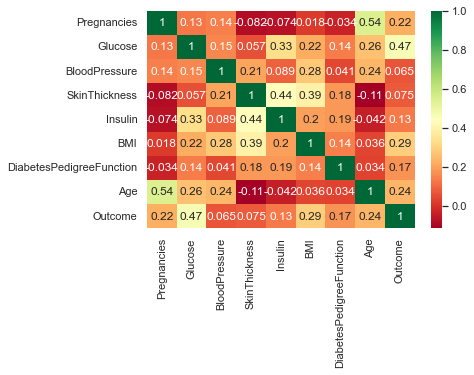

In [31]:
ax = sns.heatmap(df_nz.corr(),annot=True,cmap='RdYlGn')

# 3. Modelo y 4. Evaluación

We are going to use KNN (K-Nearest Neighbors)

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

In [11]:
#Splitting the data into dependent and independent variables
#Here we are using all attributes

y = df_nz.Outcome.values
X = df_nz.drop("Outcome", axis = 1)
print(type(y))
print(y.shape)
print(type(X))
print(X.shape)

<class 'numpy.ndarray'>
(768,)
<class 'pandas.core.frame.DataFrame'>
(768, 8)


In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 45)

In [14]:
from sklearn.neighbors import KNeighborsClassifier

#Hiperparemeters
n_neighbors=11

knn_1 = KNeighborsClassifier(n_neighbors=n_neighbors)
knn_1.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=11)

In [15]:
y_predicted_1 = knn_1.predict(X_test)

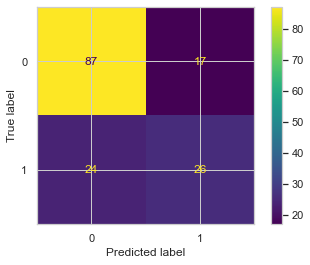

In [16]:
from sklearn import metrics

cm_knn_1 = metrics.confusion_matrix(y_test,y_predicted_1)
disp_1 = metrics.ConfusionMatrixDisplay(confusion_matrix = cm_knn_1)
disp_1.plot()

In [17]:
TN_1 = cm_knn_1[0,0]
FP_1 = cm_knn_1[0,1]
FN_1 = cm_knn_1[1,0]
TP_1 = cm_knn_1[1,1]

In [18]:
# Exactitud (accuracy) = (TP+TN)/(TP+TN+FP+FN)

acc_1 = (TP_1 + TN_1)/(TP_1 + TN_1 + FP_1 + FN_1)
print('Accuracy on test data: %.4f'% acc_1)

Accuracy on test data: 0.7338


Accuracy on train data: 0.7850


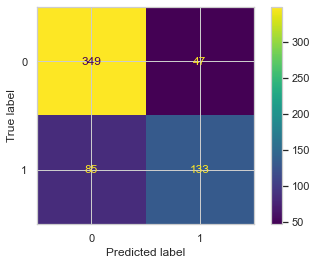

In [19]:
y_pred_train = knn_1.predict(X_train)
cm_knn = metrics.confusion_matrix(y_train,y_pred_train)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm_knn)
disp.plot()
TN = cm_knn[0,0]
FP = cm_knn[0,1]
FN = cm_knn[1,0]
TP = cm_knn[1,1]
acc_train = (TP + TN)/(TP + TN + FP + FN)
print('Accuracy on train data: %.4f'% acc_train)

Accuracy on test data: 0.7468


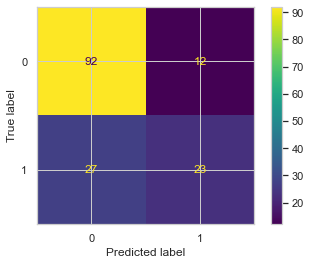

In [20]:
#Hiperparemeters
n_neighbors=21

knn_2 = KNeighborsClassifier(n_neighbors=n_neighbors)
knn_2.fit(X_train,y_train)
y_predicted_2 = knn_2.predict(X_test)
cm_knn_2 = metrics.confusion_matrix(y_test,y_predicted_2)
disp_2 = metrics.ConfusionMatrixDisplay(confusion_matrix = cm_knn_2)
disp_2.plot()
TP_2 = cm_knn_2[1,1]
TN_2 = cm_knn_2[0,0]
FP_2 = cm_knn_2[0,1]
FN_2 = cm_knn_2[1,0]
acc_2 = (TP_2 + TN_2)/(TP_2 + TN_2 + FP_2 + FN_2)
print('Accuracy on test data: %.4f'% acc_2)

Accuracy on train data: 0.7915


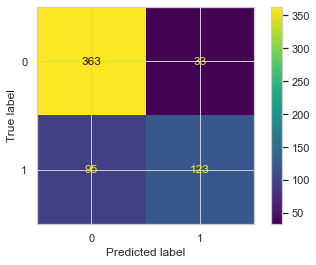

In [21]:
y_pred_train = knn_2.predict(X_train)
cm_knn = metrics.confusion_matrix(y_train,y_pred_train)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm_knn)
disp.plot()
TN = cm_knn[0,0]
FP = cm_knn[0,1]
FN = cm_knn[1,0]
TP = cm_knn[1,1]
acc_train = (TP + TN)/(TP + TN + FP + FN)
print('Accuracy on train data: %.4f'% acc_train)

Accuracy on test data: 0.7143


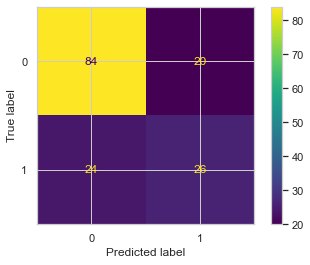

In [22]:
#Hiperparemeters
n_neighbors=5

knn_3 = KNeighborsClassifier(n_neighbors=n_neighbors)
knn_3.fit(X_train,y_train)
y_predicted_3 = knn_3.predict(X_test)
cm_knn_3 = metrics.confusion_matrix(y_test,y_predicted_3)
disp_3 = metrics.ConfusionMatrixDisplay(confusion_matrix = cm_knn_3)
disp_3.plot()
TP_3 = cm_knn_3[1,1]
TN_3 = cm_knn_3[0,0]
FP_3 = cm_knn_3[0,1]
FN_3 = cm_knn_3[1,0]
acc_3 = (TP_3 + TN_3)/(TP_3 + TN_3 + FP_3 + FN_3)
print('Accuracy on test data: %.4f'% acc_3)

Accuracy on train data: 0.8274


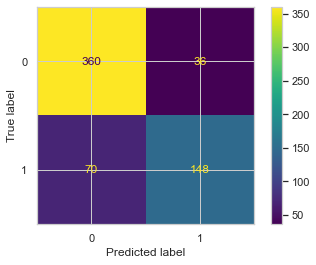

In [24]:
y_pred_train = knn_3.predict(X_train)
cm_knn = metrics.confusion_matrix(y_train,y_pred_train)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm_knn)
disp.plot()
TN = cm_knn[0,0]
FP = cm_knn[0,1]
FN = cm_knn[1,0]
TP = cm_knn[1,1]
acc_train = (TP + TN)/(TP + TN + FP + FN)
print('Accuracy on train data: %.4f'% acc_train)

In [25]:
#Splitting the data into dependent and independent variables
#Here we are using some attributes

#atributo = "Age" 
#atributo = "BloodPressure"
#atributo = "BMI"
#atributo = "DiabetesPedigreeFunction"
#atributo = "Glucose"
#atributo = "Insulin"
#atributo = "Pregnancies"
#atributo = "SkinThickness"

y = df_nz.Outcome.values
X = df_nz[["Glucose","BMI"]]
print(type(y))
print(y.shape)
print(type(X))
print(X.shape)

<class 'numpy.ndarray'>
(768,)
<class 'pandas.core.frame.DataFrame'>
(768, 2)


Accuracy on test data: 0.7338


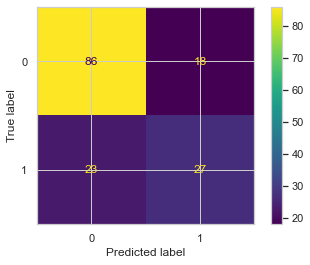

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 45)

#Hiperparemeters
n_neighbors=5

knn = KNeighborsClassifier(n_neighbors=n_neighbors)
knn.fit(X_train,y_train)
y_predicted = knn.predict(X_test)
cm_knn = metrics.confusion_matrix(y_test,y_predicted)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm_knn)
disp.plot()
TP = cm_knn[1,1]
TN = cm_knn[0,0]
FP = cm_knn[0,1]
FN = cm_knn[1,0]
acc = (TP + TN)/(TP + TN + FP + FN)
print('Accuracy on test data: %.4f'% acc)

Accuracy on train data: 0.7932


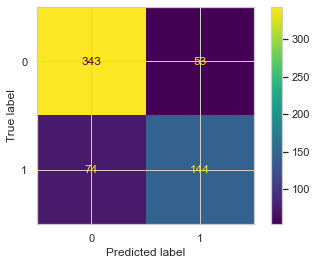

In [32]:
y_predicted = knn.predict(X_train)
cm_knn = metrics.confusion_matrix(y_train,y_predicted)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm_knn)
disp.plot()
TP = cm_knn[1,1]
TN = cm_knn[0,0]
FP = cm_knn[0,1]
FN = cm_knn[1,0]
acc_train = (TP + TN)/(TP + TN + FP + FN)
print('Accuracy on train data: %.4f'% acc_train)